# CC3001 Otoño 2023 Tarea 1 Valentina Alarcón Yáñez

# Pilas de arena abelianas

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Introducción
El objetivo de esta tarea es estudiar un problema inspirado en un fenómeno físico, a través de un modelo matemático, el cual si bien es sencillo, produce resultados que presentan una estructura muy interesante.

<img src="https://ivan-sipiran.com/downloads/arena.png" alt= “” width="200">

La idea es que si uno va formando una pila de arena, llega un momento en que se produce un derrumbe, y la arena de esa pila se derrama hacia los lugares vecinos, estos a su vez se pueden derrumbar, y el proceso continúa hasta que finalmente se estabiliza.

Para estudiar este proceso, usaremos un modelo ultra simplificado. Supondremos que la arena se deposita sobre una superficie plana, la cual está dividida en pequeñas celdas cuadradas, las cuales forman un tablero como se muestra en la siguiente figura:

<img src="https://ivan-sipiran.com/downloads/tablero.png" alt= “” width="100">

El modelo supone que si se apilan demasiados granos de arena en una celda, se produce un derrumbe. En particular, la regla es que si en una celda hay 4 o más granos, se le quitan 4 granos, que se reparten equitativamente hacia las celdas vecinas en los cuatro puntos cardinales.

Para simular este proceso, supondremos que cada celda almacena un número entero, que es la cantidad de granos almacenados en su interior. Aplicando la regla antes descrita (y suponiendo que las celdas que aparecen vacías tienen cero granos), desde la configuración

<img src="https://ivan-sipiran.com/downloads/tablero1.png" alt= “” width="100">

se pasaría a

<img src="https://ivan-sipiran.com/downloads/tablero2.png" alt= “” width="100">

Cuando hay más de una casilla con exceso de granos de arena, la regla se puede aplicar a ellas en cualquier orden y el resultado final es el mismo. Esta propiedad es la que hace que estas pilas de arena se llamen abelianas.

La idea es partir desde una configuración inicial, y luego aplicar esta regla en todos los casilleros que se pueda, hasta que no quede ninguno que tenga 4 o más granos de arena. Esa configuración final la vamos a visualizar asignando un color distinto a cada número de granos.

En particular, nos va a interesar estudiar lo que ocurre cuando la configuración inicial tiene todas las celdas vacías, excepto la del centro, en la cual hay $N$ granos de arena (donde $N$ es un parámetro del problema).

Note que en teoría el tablero es infinito en el sentido que siempre hay espacio para colocar los granos de arena que se van distribuyendo. Para su simulación, usted debe calcular un tamaño del tablero lo suficientemente grande como para estar seguro que ningún grano de arena se salga hacia afuera de los bordes (calcule la máxima área que se puede cubrir con $N$ granos de arena, y después calcule cuan grande debe ser el tablero  para poder contener esa área).

# Tarea

## Parte 1
Usted debe escribir una función en Python llamada ``arena``, tal que dado un valor de $N$, simule el proceso anteriormente descrito hasta que se estabilice. El programa debe contar e imprimir el número total de veces que se aplicó la regla que distribuye granos de arena hacia los vecinos. Además, debe visualizar en la pantalla el tablero resultante, usando los métodos que se describen más adelante.

Por ejemplo, al simular con $N=10000$, la figura que resulta es

<img src="https://ivan-sipiran.com/downloads/tablero3.png" alt= “” width="250">

La idea va a ser ejecutar la función con un valor de $N$ dado por el profesor ($N=128$) y luego con valores crecientes de $N$, hasta el mayor número que pueda alcanzar dentro de un tiempo de ejecución razonable.



Escriba a continuación la definición de su función:

La cantidad de iteraciones es= 21


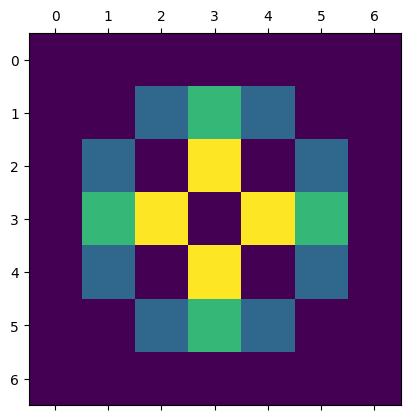

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Primero crearemos una función auxiliar que nos ayudará para crear el tablero,
# Considerado que esperamos una figura final similar a la de un círculo

# radio: int -> int
# devuelve la mejor aproximación mayor entera de un radio calculado
# según un número N de casillas en un círculo
# ejemplo: radio(4)==2
# además, usaremos la función "ceil" del módulo math para la aproximación.

def radio(x):
  pi = math.pi
  rad = math.sqrt(x/pi)
  int_rad = math.ceil(rad)
  return int_rad

# Crearemos otra función auxiliar llamada "crear matriz" que genere las matrices de numpy
# De un tamaño adecuado a lo solicitado
# Y agregando una unidad, tal que siempre haya una celda central

# crear_matriz: int -> array
# toma un radio p, lo hace diámetro, y crea una matriz de numpy simétrica de lado 2p+1 y compuesta por 0's.
def crear_matriz(p):
  diametro_tablero = p*2 +1
  mat_tablero = np.zeros((diametro_tablero,diametro_tablero))
  return (mat_tablero)


#finalmente, creemos arena
def arena(N):
  radio_tab = radio(N)
  diametro_tab = radio_tab*2 +1
  matriz_tab = crear_matriz(radio_tab)
  matriz_tab[radio_tab][radio_tab] +=N
  p=0
  #REVISAR
  # Agrego un iterador lo suficientemente grande para que realice la inspección de los elementos la cantidad necesaria de veces.
  #for j in range(0,N):
  ind = (radio_tab,radio_tab)
  while matriz_tab[ind]>=4:
   # A partir de aquí, voy a seleccionar filas para recorrerlas y buscar lo solicitado.
   for k in range(0,diametro_tab):
     fila_tab = matriz_tab[:,k]
     for i in range(0,diametro_tab):
       while fila_tab[i] >=4:
         #arriba
         matriz_tab[i][k-1] +=1
         #abajo
         matriz_tab[i][k+1] +=1
         #izquierda
         matriz_tab[i-1][k] +=1
         #derecha
         matriz_tab[i+1][k] +=1
         #central
         matriz_tab[i][k] -=4
         #contador de iteraciones
         p+=1
         #redefino el índice asociado al valor máximo de la matriz para seguir con la inspección
         ind = np.unravel_index(np.argmax(matriz_tab), (diametro_tab,diametro_tab))
  #Printeamos la cantidad de iteraciones
  print("La cantidad de iteraciones es= "+ str(p))
  #Dibujando
  visualizacion = plt.matshow(matriz_tab)
  plt.show()
  return visualizacion
#0 es moradito
#1 es azul
#2 es verde
#3 es amarillo

#Probemos para N=28
arena(28)

Explique aquí cómo calculó el tamaño que necesita tener el tablero.

En primer lugar, es posible pensar que el peor de los casos es aquel donde quedaría un grano por casillero. Por otro lado, por la forma en que estos se distribuyen en sus ejes cardinales, podemos pensar que la forma se asemejaría cada vez más a un círculo. Luego, siendo N la cantidad de casilleros en un círculo, es válido usar la fórmula de área de un círculo $πr^2$ = N.

De esta forma creé "radio()", función que devuelve la mejor aproximación mayor entera de un radio calculado según un número N de casillas en un círculo. Además, usé la función "ceil" del módulo math para la aproximarlo al número entero mayor más cercano, tal que podamos luego transformarlo a cantidad de casillas y el círculo siempre quede inscrito por dentro de la matriz.
Luego, creé "crear matriz()" que genera las matrices de numpy de un tamaño adecuado a lo solicitado: el doble del radio recientemente calculado, más una unidad (para que siempre haya una celda central)

Ahora ejecute la función para $N=128$:

La cantidad de iteraciones es= 342


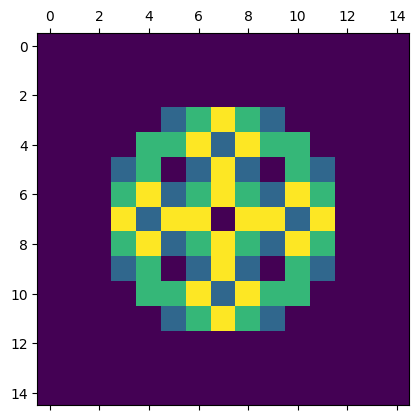

In [ ]:
arena(128)

La cantidad de iteraciones es= 41763


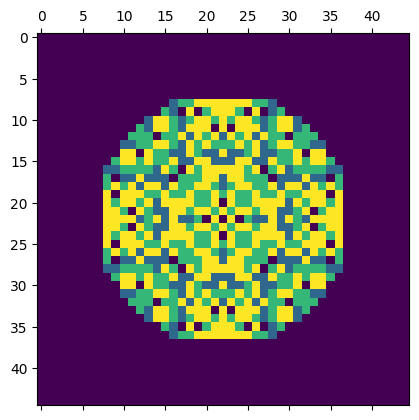

In [ ]:
#N=1500
arena(1500)

In [ ]:
#N=5000
arena(5000)

La cantidad de iteraciones es= 1022122


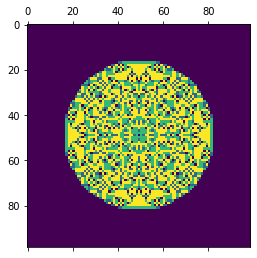

In [ ]:
#N=7500
arena(7500)

A continuación ejecute la función para el valor más grande de $N$ que consiga alcanzar en un tiempo razonable:

La cantidad de iteraciones es= 1830917


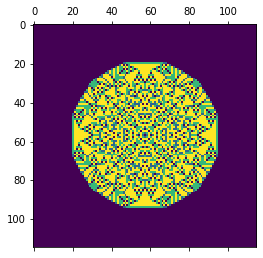

In [ ]:
arena(10000) # reemplace N por el valor máximo que alcanzó a procesar
# N=10000 procesa en 58 segundos aprox

## Parte 2
Observe que cuando en una celda hay un número grande de granos de arena, es muy ineficiente ir quitándole de 4 en 4, y sería mejor quitar de una sola vez lo más que se pueda. Podemos mejorar nuestro programa si cambiamos la regla de distribución, y decimos que si en una celda hay un número de granos de arena mayor o igual a 4, le quitamos de una sola vez el mayor múltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos de los cuatro puntos cardinales. Escriba una versión modificada de su función de acuerdo a esta nueva regla.



La cantidad de iteraciones es= 15


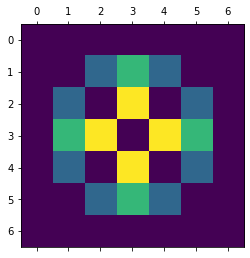

In [ ]:
def arena2(N):
  radio_tab = radio(N)
  diametro_tab = radio_tab*2 +1
  matriz_tab = crear_matriz(radio_tab)
  matriz_tab[radio_tab][radio_tab] +=N
  p=0
  #REVISAR
  #for j in range(0,N):
  ind = (radio_tab,radio_tab)
  while matriz_tab[ind]>=4:
   #selecciono filas
   for k in range(0,diametro_tab):
     fila_tab = matriz_tab[:,k]
     for i in range(0,diametro_tab):
       while fila_tab[i] >=4:
         #arriba
         matriz_tab[i][k-1] +=(4*(fila_tab[i]//4))/4
         #abajo
         matriz_tab[i][k+1] +=(4*(fila_tab[i]//4))/4
         #izquierda
         matriz_tab[i-1][k] +=(4*(fila_tab[i]//4))/4
         #derecha
         matriz_tab[i+1][k] +=(4*(fila_tab[i]//4))/4
         #central
         matriz_tab[i][k] -=(4*(fila_tab[i]//4))
         #contador de iteraciones
         p+=1
         #redefino el índice asociado al valor máximo de la matriz para seguir con la inspección
         ind = np.unravel_index(np.argmax(matriz_tab), (diametro_tab,diametro_tab))
  #Printeamos la cantidad de iteraciones
  print("La cantidad de iteraciones es= "+ str(p))
  #Dibujando
  visualizacion = plt.matshow(matriz_tab)
  plt.show()
  return visualizacion
#0 es moradito
#1 es azul
#2 es verde
#3 es amarillo

#Probemos para N=28
arena2(28)

Ahora ejecute la función para $N=128$:

La cantidad de iteraciones es= 227


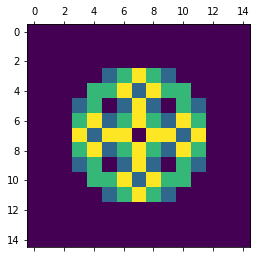

In [ ]:
arena2(128)

La cantidad de iteraciones es= 27377


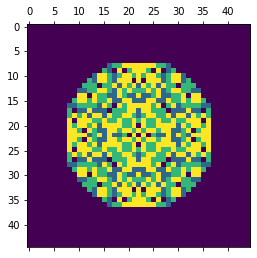

In [ ]:
arena2(1500)

La cantidad de iteraciones es= 307656


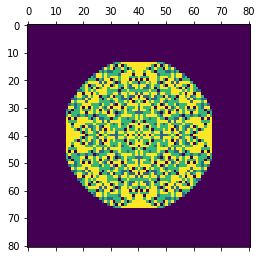

In [ ]:
arena2(5000)

La cantidad de iteraciones es= 665532


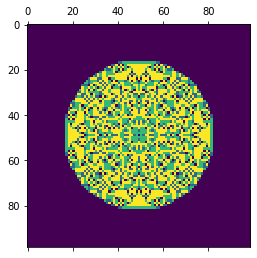

In [ ]:
arena2(7500)

La cantidad de iteraciones es= 1196817


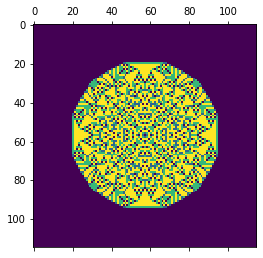

In [ ]:
arena2(10000)

A continuación ejecute la función para el valor más grande de  𝑁  que consiga alcanzar en un tiempo razonable. Note que éste número no necesariamente es el mismo que para la función anterior:

La cantidad de iteraciones es= 1462756


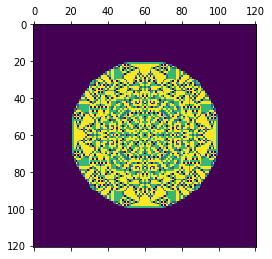

In [ ]:
arena2(11000) # reemplace N por el valor máximo que alcanzó a procesar
#N=11000 procesa en aproximadamente 54s

## Parte 3
Compare a través de una tabla y un gráfico el número de aplicaciones de la regla que hace el programa en la Parte 1 y el de la Parte 2, para los distintos valores de $N$ que usted haya calculado.

Discuta si valió la pena la optimización y discuta también (pero no implemente) otras posibles optimizaciones que se le ocurran.

Primero haremos la tabla comparativa entre el número de iteraciones asociado tanto a la parte 1 como la parte 2

| Valores de N | Parte 1 | Parte 2 |
| --- | --- | --- |
| 28 | 21 | 15 |
| 1500 | 41.763 | 27.377 |
| 5000 | 466.188 | 307.656 |
| 7500 | 1.022.122 | 665.532 |
| 10000 | 1.830.917 | 1.196.817 |

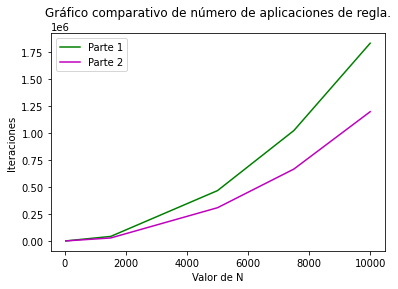

In [ ]:
#Para hacer el gráfico comparativo usaremos matplotlib

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#Parte 1: (28,21), (1500,41763), (5000,466188), (7500,1022122), (10000,1830917)
plt.plot([28, 1500, 5000,7500, 10000], [21, 41763, 466188, 1022122, 1830917], color="g", label="Parte 1")
#Parte 2: (28,15), (1500, 27377), (5000,307656), (7500,665532), (10000,1196817)
plt.plot([28, 1500, 5000,7500, 10000], [15, 27377, 307656, 665532, 1196817], color="m", label="Parte 2")
plt.title("Gráfico comparativo de número de aplicaciones de regla.")
plt.xlabel("Valor de N")
plt.ylabel("Iteraciones")
plt.legend()
plt.show()

#Es posible concluir que la parte 2 se vuelve incluso más eficiente a medida que N aumenta.

A mi parecer la optimización sí vale la pena, especialmente para valores más grandes de N. Esto, pues el código actualizado hace que el tiempo de procesamiento sea ligeramente menor y se deban hacer menos iteraciones. Es más eficiente que el inicial.

Otra posible optimización que se me ocurre sería, dado que el resultado es siempre simétrico, solo calcular una cuarta parte del círculo final. Luego, multiplicar para obtener la distribución final.

# Visualización

Para la visualización se recomienda usar arreglos de Numpy y la librería Matplotlib. A continuación un código de ejemplo:

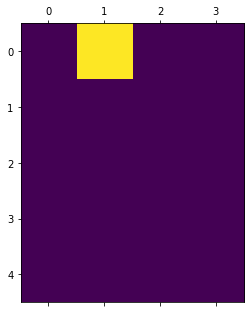

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crea una matriz de numpy llena de ceros de dimensión 5x4
mat = np.zeros((5,4))

#Asigna un uno en la posición (0,1) (eje y, eje x)
mat[0][1] = 1

#Dibuja
plt.matshow(mat)
plt.show()

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.